# Hierarchical Clustering
>  This chapter focuses on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? The chapter concludes with a discussion on the limitations of hierarchical clustering and discusses considerations while using hierarchical clustering.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Cluster Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Basics of hierarchical clustering

### Hierarchical clustering: ward method

<div class=""><p>It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

In [5]:
comic_con = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/comic_con_36x4.csv')

Instructions
<ul>
<li>Import <code>fcluster</code> and <code>linkage</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li>Use the <code>ward</code> method in the <code>linkage()</code> function.</li>
<li>Assign cluster labels by forming 2 flat clusters from <code>distance_matrix</code>.</li>
<li><em>Run the plotting code to see the results.</em></li>
</ul>

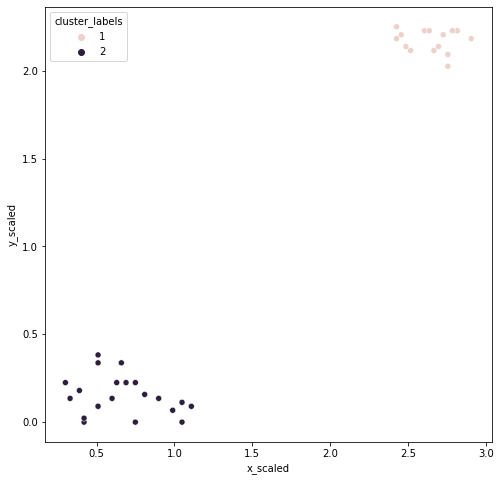

In [6]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method  = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Notice the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).**

### Hierarchical clustering: single method

<div class=""><p>Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering. </p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

Instructions
<ul>
<li>Import <code>fcluster</code> and <code>linkage</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li>Use the <code>single</code> method in the <code>linkage()</code> function.</li>
</ul>

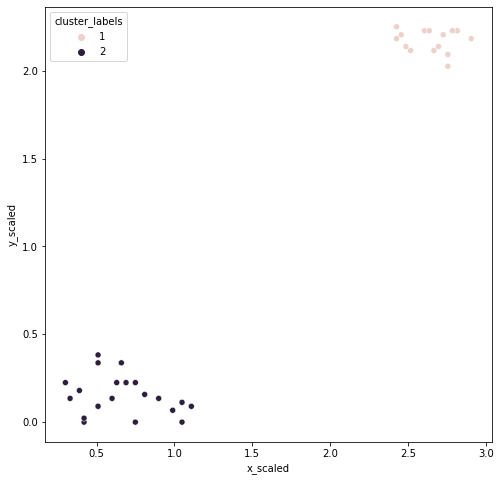

In [7]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Notice that in this example, the clusters formed are not different from the ones created using the ward method.**

### Hierarchical clustering: complete method

<div class=""><p>For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering. </p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

Instructions
<ul>
<li>Import <code>fcluster</code> and <code>linkage</code> from <code>scipy.cluster.hierarchy</code>.</li>
<li>Use the <code>complete</code> method in the <code>.linkage()</code> function.</li>
</ul>

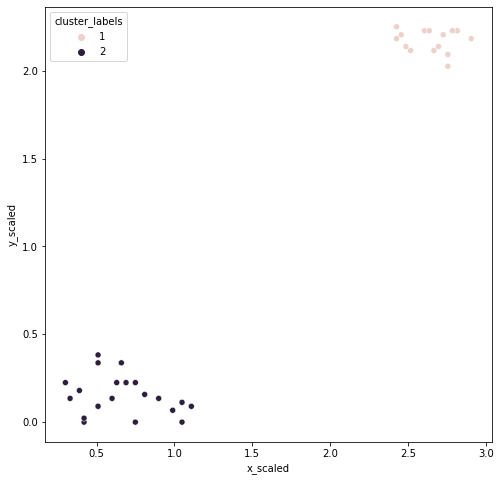

In [8]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Coincidentally, the clusters formed are not different from the ward or single methods.**

## Visualize clusters

### Visualize clusters with matplotlib

<div class=""><p>We have discussed that visualizations are necessary to assess the clusters that are formed and spot trends in your data. Let us now focus on visualizing the footfall dataset from Comic-Con using the <code>matplotlib</code> module.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time. <code>cluster_labels</code> has the cluster labels. A linkage object is stored in the variable <code>distance_matrix</code>.</p></div>

Instructions
<ul>
<li>Import the <code>pyplot</code> class from <code>matplotlib</code> module as <code>plt</code>.</li>
<li>Define a <code>colors</code> dictionary for two cluster labels, <code>1</code> and <code>2</code>.</li>
<li>Plot a scatter plot with colors for each cluster as defined by the <code>colors</code> dictionary.</li>
</ul>

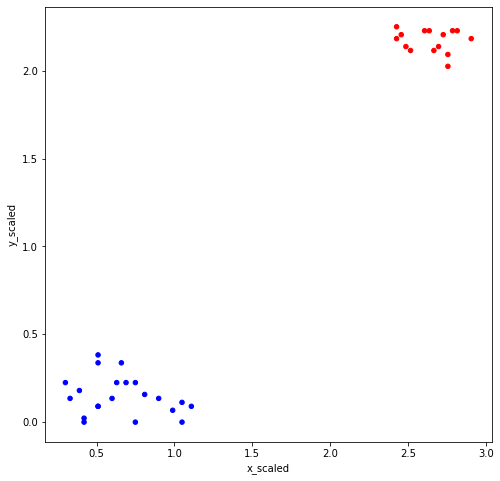

In [9]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

**The two different clusters are shown in different colors.**

### Visualize clusters with seaborn

<div class=""><p>Let us now visualize the footfall dataset from Comic Con using the <code>seaborn</code> module. Visualizing clusters using <code>seaborn</code> is easier with the inbuild <code>hue</code> function for cluster labels.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time. <code>cluster_labels</code> has the cluster labels. A linkage object is stored in the variable <code>distance_matrix</code>.</p></div>

Instructions
<ul>
<li>Import the seaborn module as <code>sns</code>.</li>
<li>Plot a scatter plot using the <code>.scatterplot()</code> method of <code>seaborn</code>, with the cluster labels as the <code>hue</code> argument.</li>
</ul>

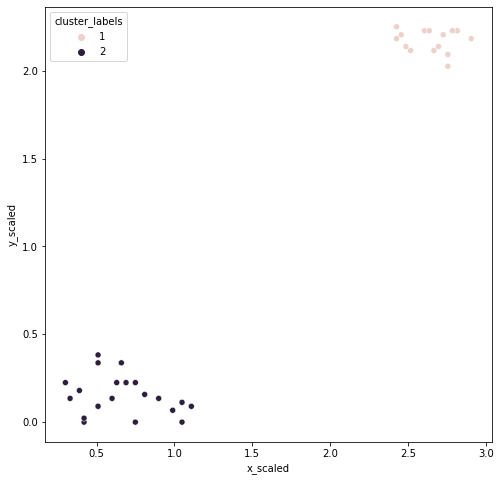

In [10]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

**Notice the legend is automatically shown when using the hue argument.**

## How many clusters?

### Create a dendrogram

<div class=""><p>Dendrograms are branching diagrams that show the merging of clusters as we move through the distance matrix. Let us use the Comic Con footfall data to create a dendrogram. </p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time. <code>cluster_labels</code> has the cluster labels. A linkage object is stored in the variable <code>distance_matrix</code>.</p></div>

Instructions
<ul>
<li>Import the <code>dendrogram</code> function from <code>scipy.cluster.hierarchy</code>.</li>
<li>Create a dendrogram using the linkage object.</li>
<li>Display the dendrogram using <code>.show()</code> method of the <code>plt</code> object.</li>
</ul>

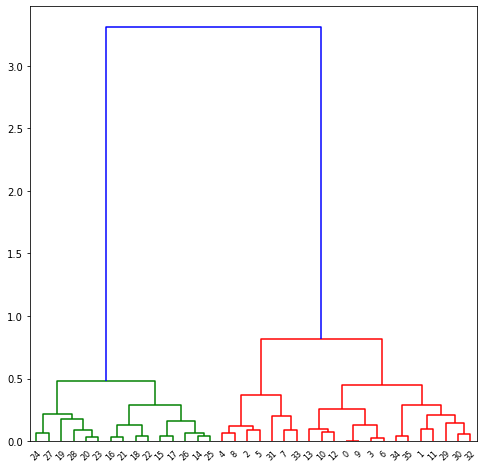

In [11]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

**Notice the significant difference between the inter-cluster distances beyond the top two clusters.**

### How many clusters in comic con data?

<div class=""><p>Given the dendrogram from the last exercise, how many clusters can you see in the data?</p>
<p>A dendrogram is stored in the variable <code>dn</code>. Use <code>plt.show()</code> to display the dendrogram.</p></div>

<pre>
Possible Answers

<b>2 clusters</b>

3 clusters

4 clusters
</pre>

**Notice that the top two clusters are farthest away from each other.**

## Limitations of hierarchical clustering

### Timing run of hierarchical clustering

<div class=""><p>In earlier exercises of this chapter, you have used the data of Comic-Con footfall to create clusters. In this exercise you will time how long it takes to run the algorithm on DataCamp's system. </p>
<p>Remember that you can time the execution of small code snippets with:</p>
<pre><code>%timeit sum([1, 3, 2])
</code></pre>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time. The <code>timeit</code> module and <code>linkage</code> function are already imported</p>
<p>How long does it take to the run the <code>linkage</code> function on the comic con data?</p></div>

<pre>
Possible Answers

1-5 microseconds

<b>1-5 milliseconds</b>

1-5 seconds
</pre>

**It took only a few milliseconds to run the data.**

### FIFA 18: exploring defenders

<div class=""><p>In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:</p>
<ul>
<li><em>sliding tackle</em>: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles</li>
<li><em>aggression</em>: a number between 0-99 which signifies the commitment and will of a player</li>
</ul>
<p>These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.</p>
<p><strong>This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.</strong></p>
<p>The following modules are pre-loaded: <code>dendrogram</code>, <code>linkage</code>, <code>fcluster</code> from <code>scipy.cluster.hierarchy</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>. The data is stored in a Pandas dataframe, <code>fifa</code>.</p></div>

In [16]:
fifa = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/fifa_5000x4.csv')

Instructions 1/4
<li>Fit the scaled data in columns <code>scaled_sliding_tackle</code> and <code>scaled_aggression</code> into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the <code>timeit</code> module.</li>

In [21]:
# Fit the data into a hierarchical clustering algorithm
%timeit distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method = 'ward', metric = 'euclidean')

1 loop, best of 3: 673 ms per loop


Instructions 2/4
<li>Assign cluster labels to each row in the data using the <code>fcluster()</code> function (use 3 clusters).</li>

In [18]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

Instructions 3/4
<li>Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.</li>

In [19]:
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.918164           4.290068
2                            1.267917           3.906601
3                            0.858130           2.180922


Instructions 4/4
<li>Create a scatter plot using <code>seaborn</code> with the <code>scaled_sliding_tackle</code> attribute on the x-axis and the <code>scaled_aggression</code> attribute on the y-axis. Assign a different color to each cluster.</li>

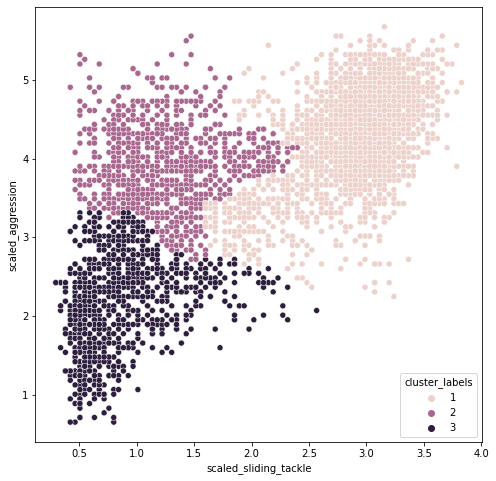

In [20]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

**Notice how long it took to run hierarchical clustering on a few thousand data points. In the next chapter, you will explore clusters in data through k-means clustering.**